<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/japan/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 일본 내 위치별 지진 위험도 분석

**작성자:**  
  - 제타폰 사차오호 (1600900730)  
  - 차윳 소몽잉 (1600900987)


## 작업 흐름 단계

1. 질문 또는 문제 정의.
2. 훈련 및 테스트 데이터 수집.
3. 데이터 정리, 준비, 정제.
4. 데이터 분석, 패턴 식별 및 탐색.
5. 모델링, 예측 및 문제 해결.
6. 문제 해결 단계 및 최종 솔루션 시각화, 보고 및 발표.

## 질문 및 문제 정의

일본은 지진이 자주 발생하는 국가입니다.  
일본에 거주해야 할 경우, 각 도시나 특정 지역의 지진 발생 빈도 및 강도에 대한 정보를 갖는 것이 중요합니다.  
따라서 이 모델은 특정 좌표가 어느 정도의 지진 위험 구역에 위치하는지를 예측할 수 있도록 설계됩니다.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install basemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [1]:
import numpy as np
import pandas as pd
import datetime

# Visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import folium
from folium import *
from folium.plugins import *
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import os
from subprocess import check_output

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import geopandas as gpd

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from pathlib import Path

train_data = pd.read_csv("/content/drive/MyDrive/일본/Japan earthquakes 2001 - 2018.csv")

# Analyze by describing data

 ดูตัวแปรว่ามีอะไรบ้าง

In [2]:
print(train_data.columns.values) #

['time' 'latitude' 'longitude' 'depth' 'mag' 'magType' 'nst' 'gap' 'dmin'
 'rms' 'net' 'id' 'updated' 'place' 'type' 'horizontalError' 'depthError'
 'magError' 'magNst' 'status' 'locationSource' 'magSource']


* **Latitude (위도)**: 지구의 적도를 기준으로 측정된 각도. 적도의 위도가 0으로 설정됩니다.
* **Longitude (경도)**: 지구의 주요 경선(본초 자오선)을 기준으로 지구를 여러 대륙으로 나누는 역할을 합니다.
* **Time (시간)**: 지진이 발생한 날짜와 시간.
* **Depth (깊이)**: 지진의 진앙(지표면에서 지진이 발생한 지점까지의 거리) 깊이.
* **Mag (규모)**: 지진의 진도, 즉 지진으로 인한 진동의 크기.
* **Place (장소)**: 사건이 발생한 지리적 위치를 설명하는 텍스트.
* **MagType (규모 유형)**: 진도 측정에 사용된 단위.
* **Nst (관측소 수)**: 지진을 측정하는 데 사용된 관측소의 수.
* **Gap (갭)**: 인접한 관측소 사이의 가장 큰 방위각 간격 [0.0, 180.0].
* **Dmin (최소 거리)**: 지진의 진앙에서 가장 가까운 관측소까지의 수평 거리 [0.4, 7.1].
* **Rms (평균 제곱근 오차)**: 모든 측정값의 가중치를 적용한 후 계산된 평균 제곱근 오차의 시간(초).
* **Net (네트워크 ID)**: 데이터를 제공한 네트워크의 ID.
* **ID (식별자)**: 해당 사건을 고유하게 식별하는 식별자 또는 변수.
* **Updated (업데이트 시간)**: 사건 정보가 마지막으로 업데이트된 시간.
* **Type (유형)**: 지진 사건의 유형.
* **HorizontalError (수평 오차)**: 보고된 사건 위치의 수평 오차(단위: km).
* **DepthError (깊이 오차)**: 보고된 사건 깊이의 오차(단위: km).
* **MagError (규모 오차)**: 보고된 지진 규모의 오차.
* **Magnst (규모 측정 관측소 수)**: 이 지진의 규모를 계산하는 데 사용된 관측소의 수.
* **Status (상태)**: 사건이 인간에 의해 검토되었는지 여부를 나타내는 변수.
* **LocationSource (위치 출처)**: 이 사건의 위치를 보고한 네트워크.
* **MagSource (규모 출처)**: 이 사건의 규모를 보고한 네트워크.


In [3]:
train_data.head() #ดูข้อมูลในตาราง

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us


In [4]:
train_data.shape

(14092, 22)

데이터는 14092개의 행과 22개의 열로 구성되어 있습니다.

데이터프레임의 마지막 몇 줄을 확인하세요

In [5]:
train_data.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
14087,2001-01-04T04:18:21.430Z,36.981,138.629,21.4,5.3,mwc,240.0,NaN,NaN,0.78,...,2016-11-09T21:35:38.927Z,"eastern Honshu, Japan",earthquake,NaN,5.4,NaN,NaN,reviewed,us,hrv
14088,2001-01-03T14:47:49.540Z,43.932,147.813,33.0,5.9,mwc,362.0,NaN,NaN,0.82,...,2016-11-09T04:09:27.754Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
14089,2001-01-03T09:32:54.710Z,45.301,149.941,33.0,4.6,mb,40.0,NaN,NaN,0.82,...,2014-11-07T01:11:51.270Z,Kuril Islands,earthquake,NaN,NaN,NaN,20.0,reviewed,us,us
14090,2001-01-02T20:29:49.670Z,32.239,141.508,33.0,4.9,mb,32.0,NaN,NaN,0.96,...,2014-11-07T01:11:51.119Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,23.0,reviewed,us,us
14091,2001-01-02T10:53:23.280Z,37.218,138.431,33.0,4.9,mb,43.0,NaN,NaN,0.93,...,2014-11-07T01:11:50.950Z,"near the west coast of Honshu, Japan",earthquake,NaN,NaN,NaN,15.0,reviewed,us,us


###데이터 정제
####유용한 열 선택하기

In [6]:
train_data = train_data[['time','latitude', 'longitude', 'depth','mag','place']]


이 6개의 열을 선택한 이유는 데이터셋의 다른 변수들이 사용되지 않거나 단순히 데이터의 부가적인 정보에 불과하기 때문입니다. 예를 들어, 측정 장비의 사양, 측정 위치, 그리고 오차 등의 값은 분석에 필요하지 않은 부수적인 정보에 해당합니다.

In [7]:
NAs = pd.concat([train_data.isnull().sum()], axis=1, keys=['null'])
NAs[NAs.sum(axis=1) > 0]

,null


데이터프레임의 특정 열에 null 값이 없는지 확인


도시와 국가 이름을 Place 열에서 분리

In [8]:
train_data[['temp', 'country']] = train_data['place'].str.split(',\s+', expand=True)

train_data[['country','place']].groupby(['country']).count().rename(columns={"place":"count"})

<ipython-input-8-9d3dadc7ca73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['temp', 'country']] = train_data['place'].str.split(',\s+', expand=True)
<ipython-input-8-9d3dadc7ca73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['temp', 'country']] = train_data['place'].str.split(',\s+', expand=True)


,count
country,
China,14
Japan,8675
Japan region,2164
North Korea,8
Russia,617
South Korea,8



일본 외의 다른 국가 데이터를 제거하고, Japan과 Japan region을 하나로 통합

In [16]:
train_data = train_data[~train_data['country'].isin(['China','North Korea','Russia','South Korea'])]
train_data.country.fillna(value= np.nan, inplace=True)
train_data['country'] = train_data['country'].replace('Japan region', 'Japan')
train_data['country'] = train_data['country'].replace(np.nan, 'Japan')
train_data[['country','place']].groupby(['country']).count().rename(columns={"place":"count"})

,count
country,
Japan,13445


필터링된 데이터가 모두 Japan으로 확인되었습니다. 쉼표(,)로 데이터를 분리하는 split 명령을 사용한 결과, 쉼표가 없는 일부 필드가 null로 표시되었습니다. 이때 Japan이 temp 열로 이동한 것을 확인하여 temp 열의 값을 country 열에 덮어씌웠습니다. 그 결과, 최종적으로 13,445개의 행이 있는 데이터를 얻을 수 있었습니다.

### ดูค่าเฉลี่ย,ส่วนเบี่ยงแบน ในข้อมูล

In [17]:
train_data.describe()

,latitude,longitude,depth,mag
count,13445.000000,13445.000000,13445.000000,13445.000000
mean,36.988671,142.726293,49.440565,4.815619
std,6.443873,6.427890,73.036612,0.376838
min,23.532900,124.293000,0.000000,4.500000
25%,32.696900,141.014000,14.000000,4.600000
50%,37.212000,142.374000,34.940000,4.700000
75%,40.969000,144.074000,49.100000,4.900000
max,50.802000,158.670000,683.360000,9.100000


- 지진의 강도는 4.8 리히터입니다.
- [mag]의 표준편차는 0.37로, 데이터가 많이 분산되지 않았습니다.
- IQR(사분위 범위)은 4.6에서 4.9로 비교적 좁습니다.
- 지진 중심의 평균 깊이는 51.36 km입니다.
- 지진 중심 깊이의 표준편차는 76.603 km입니다.
- 지진 중심의 평균 좌표는 위도 37.410294, 경도 142.980441입니다.



###날짜와 시간을 UNIX로 변환
####모델 구축 단계에서 분석을 용이하게 하기 위해 (Just in case)

In [19]:
#จัด format 2001-01-04T04:18:21.430Z ให้เป็น 2001-01-04 04:18:21.430000+00:00
train_data['time'] = pd.to_datetime(train_data['time'],format= '%Y-%m-%dT%H:%M:%S.%fZ')
#แปลงเวลาเป็น UNIX Time Stamp เพื่อให้ง่ายต่อการจัดการ

train_data['timestamp'] = train_data.time.values.astype(np.int64)

train_data.head()

,time,latitude,longitude,depth,mag,place,temp,country,mag_cat,timestamp
1,2018-11-26 23:33:50.630,36.0733,139.7830,48.82,4.8,"3km SSW of Sakai, Japan",3km SSW of Sakai,Japan,1,1543275230630000000
2,2018-11-26 13:04:02.250,38.8576,141.8384,50.56,4.5,"26km SSE of Ofunato, Japan",26km SSE of Ofunato,Japan,1,1543237442250000000
4,2018-11-25 09:19:05.010,33.9500,134.4942,38.19,4.6,"9km SW of Komatsushima, Japan",9km SW of Komatsushima,Japan,1,1543137545010000000
6,2018-11-23 14:30:14.510,37.1821,141.1721,46.76,5.2,"29km ENE of Iwaki, Japan",29km ENE of Iwaki,Japan,2,1542983414510000000
7,2018-11-23 07:19:51.110,29.3424,142.3121,10.00,4.7,"250km N of Chichi-shima, Japan",250km N of Chichi-shima,Japan,1,1542957591110000000


# Analyze by pivoting features

####Time 열에서 날짜, 월, 연도를 추출하여 별도의 열로 추가

In [20]:
#หาวัน(ตัวเลข)และเพิ่มใน col
train_data['day_of_week'] = pd.to_datetime(train_data['time']).dt.weekday+1
#หาเดือนและเพิ่มใน col
train_data['month'] = pd.to_datetime(train_data['time']).dt.month
#หาปีและเพิ่มใน col
train_data['year'] = pd.to_datetime(train_data['time']).dt.year

### 주어진 데이터를 기반으로 데이터 유형을 다음과 같이 분류할 수 있습니다 ###

**숫자형 Categorical 데이터 유형**
* Categorical: day_of_week, day_of_week_name, month, year

**숫자형 데이터 유형**
* Continuous: time, latitude, longitude, depth, mag


###연도와 월별로 지진 발생 빈도를 Heatmap으로 시각화

<Axes: xlabel='year', ylabel='month'>

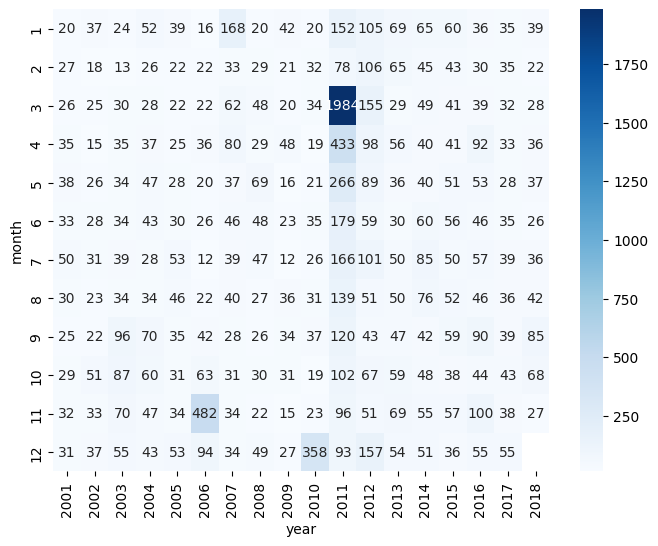

In [21]:
## ทำ Pivot จากปีและเดือนโดยนับค่าครั้งที่เกิด
pt = train_data.pivot_table(index="month",columns="year",values="mag", aggfunc="count")
#กำหนดขนาด และสี Heatmap
fig, ax = plt.subplots(figsize=(8,6))
#แสดง Heatmap
sns.heatmap(pt,cmap="Blues",annot=True,fmt='g')

Heatmap에서 2011년 3월에 지진이 1984회 발생한 것이 확인되었습니다. 또한, 해당 연도의 다른 월에서도 지진 발생 횟수가 많았습니다. 따라서 2011년 3월의 데이터를 제외하기로 했습니다

<Axes: xlabel='year', ylabel='month'>

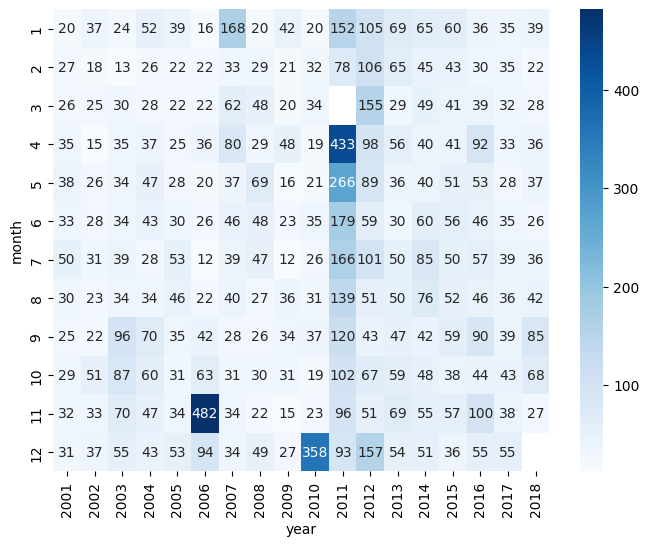

In [22]:
### เอาข้อมูลปี 2011 เดือน 3 ออก
## ทำ Pivot และ Plot อีกครั้ง
## ทำ Pivot จากปีและเดือนโดยนับค่าครั้งที่เกิด

indexNames = train_data[ (train_data['month'] == 3) & (train_data['year'] == 2011) ].index
train_data.drop(indexNames , inplace=True)

pt = train_data.pivot_table(index="month",columns="year",values="mag", aggfunc="count")
#กำหนดขนาด และสี Heatmap
fig, ax = plt.subplots(figsize=(8,6))
#แสดง Heatmap
sns.heatmap(pt,cmap="Blues",annot=True,fmt='g')


2011년 3월을 제외한 후, 전체 데이터는 더 균일해 보입니다.

###어떤 요일에 지진이 가장 많이 발생했는지 찾기

In [23]:
#ทำการนับแถวที่เกิดขึ้นในแต่ละวันแล้วนำค่าที่นับได้ในแต่ละวันมาคิดเป็น % ของทั้ง 7 วัน
train_data[['day_of_week','mag']].groupby(['day_of_week']).count().rename(columns={"mag":"% of count"}).apply(lambda x: 100 * x / float(x.sum())).round(2).rename(index={
    1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"
})

,% of count
day_of_week,
Monday,14.44
Tuesday,14.90
Wednesday,15.34
Thursday,14.16
Friday,13.49
Saturday,14.60
Sunday,13.07


데이터를 보면, 요일별로 지진 발생 확률이 거의 비슷하다는 것을 알 수 있습니다.

### 어떤 달에 지진이 가장 많이 발생했는지 찾기

In [24]:
#ทำการนับแถวที่เกิดขึ้นในแต่ละเดือนแล้วนำค่าที่นับได้ในแต่ละเดือนมาคิดเป็น % ของทั้ง 7 วัน
train_data[['month','mag']].groupby(['month']).count().rename(columns={"mag":"% of count"}).apply(lambda x: 100 * x / float(x.sum())).round(2).rename(index={
    1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"
})

,% of count
month,
January,8.72
February,5.82
March,6.02
April,10.37
May,8.17
June,7.30
July,8.04
August,7.11
September,8.20


지진 발생을 월별로 분석한 결과, 지진 발생 빈도는 전반적으로 비슷했지만, 연말인 11월과 12월에 발생 빈도가 중반기에 비해 두 배로 많았습니다. 그러나 연도별 전체 데이터를 다시 살펴본 결과, 11/2006, 12/2010, 12/2012에 데이터가 증가한 것을 알 수 있었습니다. 이는 월별로 지진 발생 확률이 거의 동일함을 나타냅니다.

지진이 낮에 더 많이 발생하는지, 밤에 더 많이 발생하는지 알아보기

In [25]:
## ทำ feature แบ่งช่วงเวลาชั่วโมงเป็น 6 ช่วงเวลา ให้ช่วงเวลา 0-4 เป็น LateNight 4-8 เป็น Early Morning เป็นต้นแล้วเพิ่มใน Column session
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
train_data['session'] = pd.cut(pd.to_datetime(train_data['time']).dt.hour, bins=b, labels=l).replace(np.nan, 'Night') ##np.nan คือเวลาชั่ว 0 เป็น NaN จึงแทนด้วย Night
## ทำ Pivot เพื่อดูว่าเวลาแต่ละช่วงเกิดแผ่นดินไหวเท่าไรโดยนับจำนวนครั้งที่เกิดในแต่ละเวลาแล้วนำมาคิดว่าช่วงเวลานั้นเป็นกี่ % เมื่อเทียบกับช่วงเวลาอื่นทั้งหมด
train_data[['session','mag']].groupby(['session']).count().rename(columns={"mag":"% of count"}).apply(lambda x: 100 * x / float(x.sum())).round(2)

<ipython-input-25-75590cb7a4ab>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['session','mag']].groupby(['session']).count().rename(columns={"mag":"% of count"}).apply(lambda x: 100 * x / float(x.sum())).round(2)


,% of count
session,
Late Night,15.68
Early Morning,16.52
Morning,17.43
Noon,18.49
Eve,19.95
Night,11.93


지진이 발생한 각 시간대를 분석한 결과, 발생 비율이 거의 동일합니다.


이 부분의 결론은, 데이터를 탐색한 결과 지진 발생은 불확실하며, 언제든지 발생할 수 있고 특정 패턴이 존재하지 않는다는 것입니다.

# Analyze by Visualizing data


어떤 도시에서 지진이 가장 많이 발생했는지 찾기

In [27]:
train_data['temp'] = train_data['temp'].str.replace("the","")
train_data[['temp1','temp2']] = train_data['temp'].str.split(' of ', expand = True)
train_data.temp2.fillna(value=np.nan, inplace=True)
#pd.set_option('display.max_rows', 1000)
train_data.loc[train_data["temp2"].isnull(),'temp2'] = train_data["temp1"];
train_data=train_data.rename(columns={"temp2":"city"})
train_data = train_data[['time','latitude', 'longitude', 'depth', 'mag','city']]
train_data = train_data[~train_data['city'].isin(['China-Russia-North Korea border region','North Korea','South Korea','Taiwan','Japan','eastern Russia-norastern China border region'])] #ลบแถวที่ชื่อCityname ไม่เกี่ยวกับญี่ปุ่น
train_data['city'] = train_data['city'].replace('eastern Honshu', 'Honshu')
train_data['city'] = train_data['city'].replace('western Honshu', 'Honshu')
train_data['city'] = train_data['city'].replace('southwestern Ryukyu Islands', 'Ryukyu Islands')
display_grouped = train_data[['city','mag']].groupby(['city']).count().rename(columns={"mag":"count"})
display_grouped.sort_values('count', ascending=False)

,count
city,
Honshu,3114
Kuril Islands,1783
Bonin Islands,845
Kuril Islands,674
Izu Islands,612
...,...
Oi,1
Kashima,1
Ogawa,1


도시 이름만 남기고 데이터를 정리한 후, 결과를 정렬한 결과 Honshu에서 지진이 가장 많이 발생한 것을 확인했습니다. Google에서 Honshu의 위치를 검색한 결과, Honshu는 일본의 주요 섬 이름임을 알게 되었습니다. 그래서 데이터를 확인해 보니 "Honshu 서쪽 150KM"와 같은 표현이 있었고, 이는 바다에서 발생한 지진 위치임을 확인했습니다.

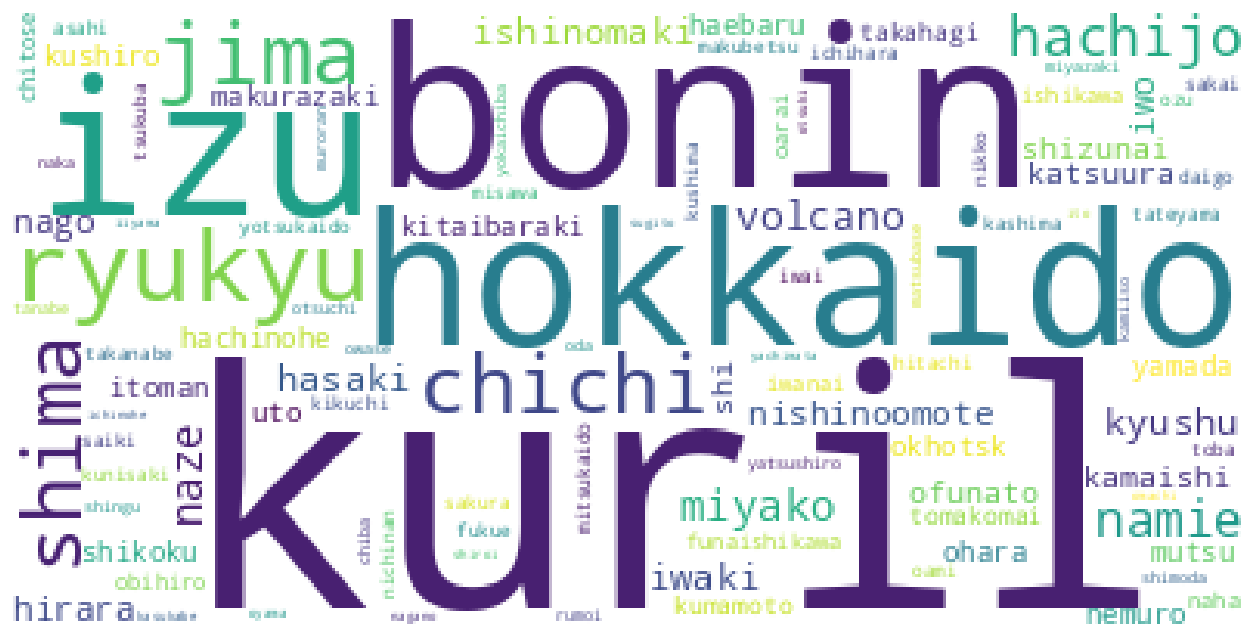

In [28]:
mpl.rcParams['figure.figsize']=(16.0,10.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10
mpl.rcParams['savefig.dpi']=1900             #72
mpl.rcParams['figure.subplot.bottom']=.1

word_string=' '.join(train_data['city'].str.lower())
STOPWORDS = {'islands','islands','honshu','honshu','eastern','eastern','western','western'}
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=100,random_state = 42,collocations=False
                         ).generate_from_text(word_string)

plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

지진이 자주 발생하는 도시의 시각화를 위해 "Honshu"와 "eastern", "western"이라는 단어를 제거했습니다. 이는 WordCloud가 붙어 있는 문자열만을 계산하기 때문입니다. 결과적으로, 지진이 자주 발생하는 지점의 도시 이름이 큰 글자로 표시됩니다.

### 지진 발생 지점의 Heatmap

In [29]:
import folium
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[38.495035, 137.026582],
                    zoom_start = 4)

# Ensure you're handing it floats
#xx = train_data.loc[train_data['year'] == 2012]
xx = train_data
xx['latitude'] = xx['latitude'].astype(float)
xx['longitude'] = xx['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs

xx = xx[['latitude', 'longitude']]
xx = xx.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
xx = [[row['latitude'],row['longitude']] for index, row in xx.iterrows()]

# Plot it on the map
HeatMap(xx,min_opacity=0.4,radius=16, blur=10).add_to(map_hooray)

# Display the map
map_hooray

지진 발생 위치를 Heatmap으로 시각화한 결과, 빨간색 점은 해당 지역에서 지진이 여러 번 발생했음을 나타냅니다. 대부분의 지진은 육지보다 바다에서 더 많이 발생했습니다. 육지에서 지진이 많이 발생한 지역은 도쿄와 일본 남부 도시들이며, 지진 발생 위치는 작은 섬들을 따라 형성된 선을 이루고 있습니다. 또한, 지진은 일본의 동부에서 더 많이 발생하는 경향이 있습니다.

### 지진의 깊이에 따른 분포를 나타내는 차트

<ipython-input-30-a954a583c71a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['mag'], hist=True, kde=True,


,count
mag,
4.5,2549
4.6,2315
4.7,1836
4.8,1324
4.9,918
5.0,593
5.1,416
5.2,296
5.3,245


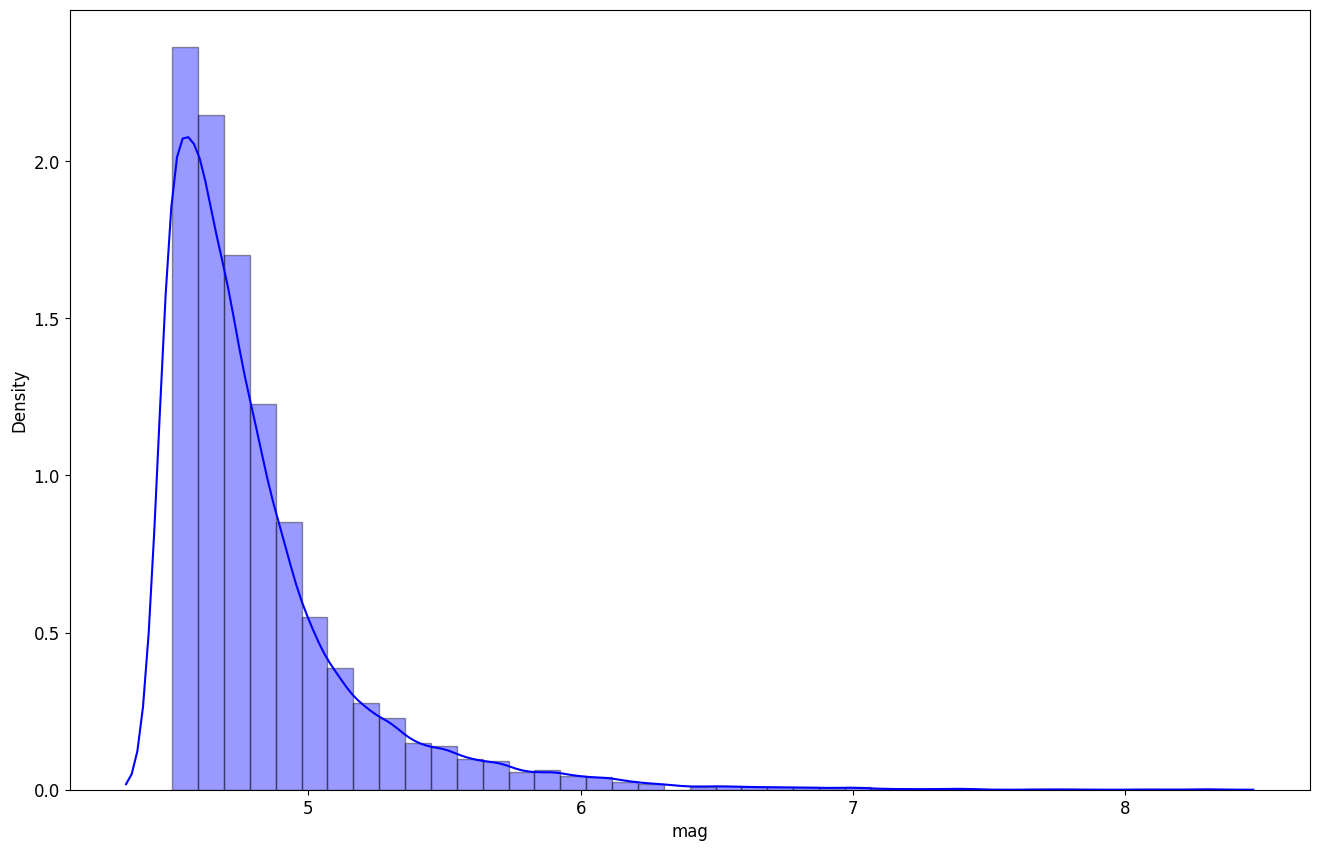

In [30]:
mgchart = train_data[['latitude','mag']].groupby(['mag']).count().rename(columns={"latitude":"count"})
sns.distplot(train_data['mag'], hist=True, kde=True,
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'})
mgchart.head(15)

### 지진 강도에 따른 발생 빈도를 나타내는 차트

<ipython-input-31-9feb3997535f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['depth'], hist=True, kde=True,


,count
depth,
0.0,1
0.6,1
0.7,1
1.0,2
1.1,1


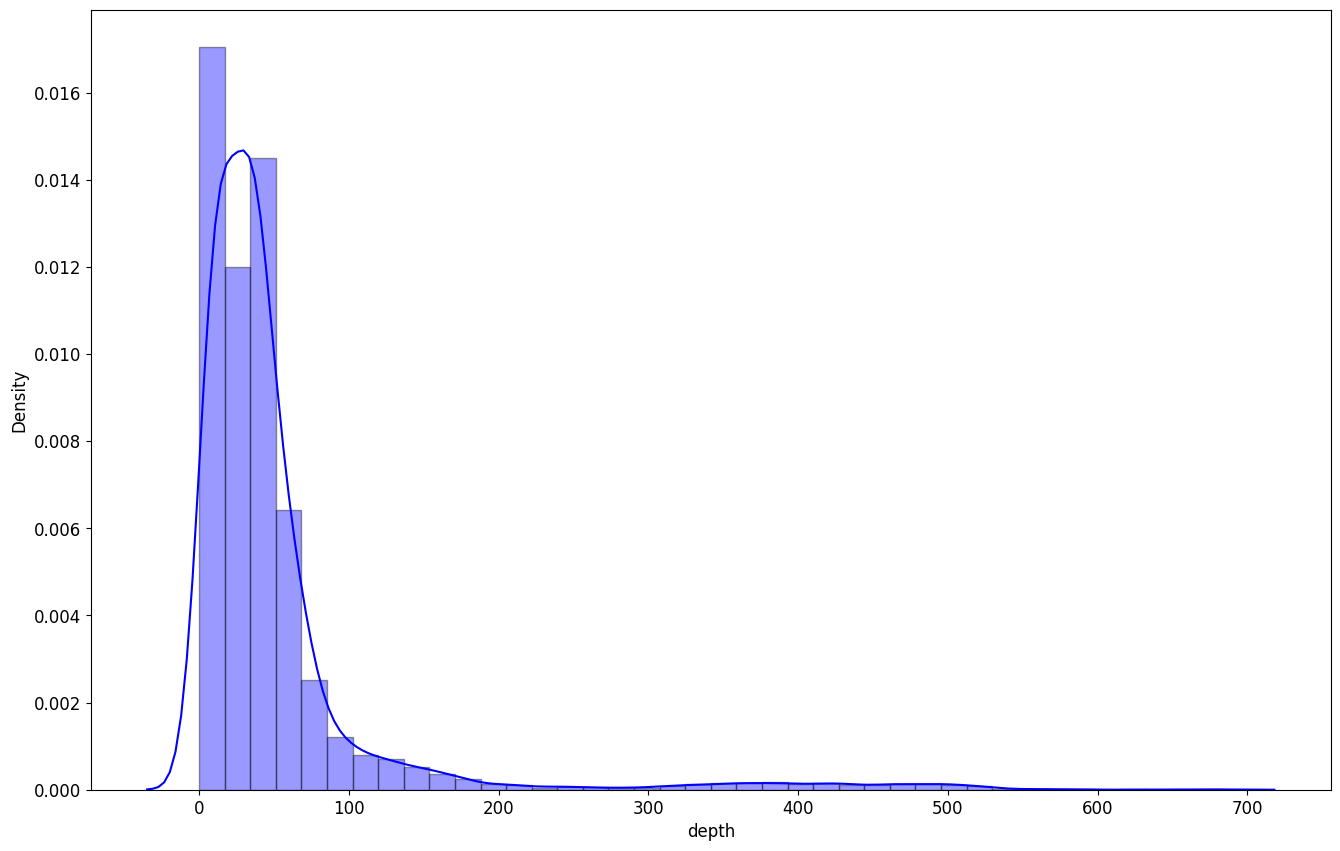

In [31]:
mgchart2 = train_data[['latitude','depth']].groupby(['depth']).count().rename(columns={"latitude":"count"})
sns.distplot(train_data['depth'], hist=True, kde=True,
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'})
mgchart2.head()

지진의 강도는 대부분 4.5-5 리히터 범위에 집중되어 있습니다. 따라서 우리는 지진 강도(mag)를 구간별로 나누어 범주화(categorize)하고, 이를 모델에 사용할 수 있습니다.

* 4.0 - 4.9: 비교적 작은 지진 (Light) = 1
* 5.0 - 5.9: 중간 규모의 지진 (Moderate) = 2
* 6.0 - 6.9: 비교적 큰 지진 (Strong) = 3
* 7.0 - 7.9: 큰 지진 (Major) = 4
* 8.0 이상: 매우 큰 지진 (Great) = 5


In [32]:
# ทำ feature โดยใช้ pd.cut แบ่งช่วงตามด้านบน
bins = [4, 5, 6, 7, 8, np.inf]
names = ['1', '2', '3', '4', '5']
train_data['mag_cat'] = pd.cut(train_data['mag'], bins, labels=names)

### 각 강도별 지진 발생 횟수 찾기

In [33]:
train_data[['mag_cat','city']].groupby(['mag_cat']).count().rename(columns={"mag":"% of count"}).rename(columns={"city":"count"})

<ipython-input-33-6e1f3a9ff4d9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['mag_cat','city']].groupby(['mag_cat']).count().rename(columns={"mag":"% of count"}).rename(columns={"city":"count"})


,count
mag_cat,
1,9535
2,1645
3,154
4,13
5,3


각 강도별로 발생한 지진 횟수를 보면, 높은 강도의 지진은 발생 빈도가 적다는 것을 알 수 있습니다.

### 각 강도 수준을 Heatmap으로 시각화하여 강도가 높은 지진이 발생하는 위치 확인하기

In [34]:
map_hooray2 = folium.Map(location=[38.495035, 137.026582],
                    zoom_start = 4)
## ทดลองเลือกความรุนแรงระดับ 4 และ 5
yy = train_data.loc[train_data['mag_cat'].isin(['4','5'])]
yy['latitude'] = yy['latitude'].astype(float)
yy['longitude'] = yy['longitude'].astype(float)

yy = yy[['latitude', 'longitude']]
yy = yy.dropna(axis=0, subset=['latitude','longitude'])

yy = [[row['latitude'],row['longitude']] for index, row in yy.iterrows()]

HeatMap(yy,min_opacity=0.8,radius=20, blur=10).add_to(map_hooray2)

map_hooray2

<ipython-input-34-d7ed5591c052>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['latitude'] = yy['latitude'].astype(float)
<ipython-input-34-d7ed5591c052>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['longitude'] = yy['longitude'].astype(float)


Heatmap에서 지진 강도 카테고리 4와 5의 지점은 빨간색으로 표시된 부분이 있으며, 이 지점들은 지진이 반복적으로 발생한 지역입니다. 따라서 이러한 강도 높은 지진이 발생한 지역 주변은 위험할 수 있습니다. 이 정보를 바탕으로 Latitude와 Longitude를 변수로 사용하여 모델을 구축하고, 지진 위험도가 높은 지역을 파악하려고 합니다.

# 모델

위의 데이터를 바탕으로, 특정 좌표에서 발생할 수 있는 지진의 강도를 예측하는 모델을 설계하기로 했습니다. 이 모델은 longitude, latitude, 그리고 도시 이름(city) 정보를 사용하여, 사용자가 자신의 위치가 어느 위험 수준에 해당하는지 확인할 수 있도록 합니다.

[mag_cat]는 1-5의 5단계로 나누어진 강도 범주입니다.

머신러닝에서는 지도 학습(supervised learning) 방식으로 분류(Classification) 모델을 선택하였으며, 이는 모델이 예측할 값이 5단계로 구분된 지진 강도 범주이기 때문입니다.

## 단계

1. **도시 데이터를 원-핫 인코딩(One Hot Encoding)으로 변환**
   - 도시 이름을 모델이 이해할 수 있는 형태로 변환합니다.

2. **테스트 및 훈련 데이터 분할**
   - 데이터를 훈련 데이터와 테스트 데이터로 나누어 모델의 성능을 평가할 준비를 합니다.

3. **다양한 모델 훈련**
   - 여러 가지 모델을 훈련하여 지진 강도를 예측합니다.

4. **성능 평가**
   - 각 모델의 성능을 측정하여 모델의 정확도를 평가합니다.

5. **모델 성능 비교**
   - 훈련된 모델들의 성능을 비교하여 가장 효과적인 모델을 찾습니다.

6. **모델 선택**
   - 비교 결과를 바탕으로 실제 사용에 적합한 모델을 선택합니다.

7. **모델 배포 및 사용**
   - 선택된 모델을 실제 환경에 적용하여 예측 작업을 수행합니다.


###훈련 데이터와 테스트 데이터 분할

city 데이터를 원-핫 인코딩으로 변환합니다. 이는 데이터가 범주형(categorical)이라서 모델에서 직접 사용할 수 없기 때문입니다. 이후, 이 데이터를 주 데이터의 latitude와 longitude와 결합하여 변수 X를 생성합니다. 변수 y는 이전에 설정한 지진 강도 수준인 mag_cat 열로 정의됩니다.

In [35]:

city = pd.get_dummies(train_data['city'])
X = pd.concat([train_data['longitude'],train_data['latitude'],city], axis = 1)
#X = pd.get_dummies(train_data['city'])
y = train_data[['mag_cat']]

X

,longitude,latitude,Bonin Islands,Izu Islands,Kuril Islands,Ryukyu Islands,Volcano Islands,Abashiri,Ageo,Akita-shi,...,Yaita,Yaizu,Yamada,Yanai,Yatsushiro,Yellow Sea,Yoichi,Yokaichiba,Yokote,Yotsukaido
1,139.7830,36.0733,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,141.8384,38.8576,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,134.4942,33.9500,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,141.1721,37.1821,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,142.3121,29.3424,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,138.6290,36.9810,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14088,147.8130,43.9320,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14089,149.9410,45.3010,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14090,141.5080,32.2390,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


원-핫 인코딩을 적용한 후의 데이터


In [36]:
#แบ่งข้อมูล test train ใช้อัตราส่วน train 80 test 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)
print(X.shape)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(11350, 241)
(9080, 241) (2270, 241) (9080, 1) (2270, 241)


총 13,335개의 데이터에서 train_test_split을 사용하여 데이터를 분할한 결과, 훈련 데이터는 80%로 10,668개(2057, 2)이며, 테스트 데이터는 20%로 2,667개가 되었습니다.

## 여러 모델 훈련 시작

### Support Vector Machines Model

RBF 커널(Radial Basis Function)을 선택한 이유는 데이터의 분포가 지진의 반경과 유사하기 때문입니다.
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_003.png)

In [37]:
# Support Vector Machines
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Linear SVC

In [38]:
# Linear SVC
from sklearn import svm
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## RandomForest Model

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
#f1_random_forest = round(f1_score(y_test, random_forest_pred, average='macro')* 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



실험 결과, n_estimators=2가 가장 좋은 성능을 보였습니다.

### KNN (k nearest neighbors) classification

이 모델을 선택한 이유는 각 지점의 지도 좌표가 등고선(Contour)처럼 보이기 때문입니다.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png)

In [40]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=2,)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
#f1_knn = round(f1_score(y_test, knn_pred, average='macro')* 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### LGBM Classifier

In [41]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='multiclass', random_state=44)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, y_train) * 100, 2)
#f1_lgbm = round(f1_score(y_test, lgbm_pred, average='macro')* 100, 2)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 9080, number of used features: 40
[LightGBM] [Info] Start training from score -0.177268
[LightGBM] [Info] Start training from score -1.917143
[LightGBM] [Info] Start training from score -4.293548
[LightGBM] [Info] Start training from score -6.548880
[LightGBM] [Info] Start training from score -8.015217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

### สรุปเปรียบเทียบ Accuracy Socre ของ Model แต่ละแบบ

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'LightGBM', 'Linear SVC'],
    'Accuracy': [acc_svc, acc_knn,
              acc_random_forest, acc_lgbm, acc_linear_svc],
    #'F1': [f1_svc, f1_knn,f1_random_forest, f1_lgbm, f1_linear_svc]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,91.19
3,LightGBM,84.61
0,Support Vector Machines,83.76
4,Linear SVC,83.76
1,KNN,82.73


혼동 행렬(confusion matrix)의 값을 계산합니다.

Random Forest

In [43]:
confusion_matrix(y_test,random_forest_pred)

array([[1795,  124,    8,    3],
       [ 272,   36,    1,    1],
       [  26,    4,    0,    0],
       [   0,    0,    0,    0]])

Linear SVC

In [44]:
confusion_matrix(y_test,linear_svc_pred)

array([[1930,    0,    0],
       [ 310,    0,    0],
       [  30,    0,    0]])

LightGBM

In [45]:
confusion_matrix(y_test, lgbm_pred)

array([[1917,    9,    1,    1,    2],
       [ 303,    5,    1,    0,    1],
       [  30,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0]])

Support Vector Machines

In [46]:
confusion_matrix(y_test, svc_pred)

array([[1930,    0,    0],
       [ 310,    0,    0],
       [  30,    0,    0]])

KNN

In [47]:
confusion_matrix(y_test, knn_pred)

array([[1849,   81,    0],
       [ 281,   29,    0],
       [  26,    4,    0]])

각 모델의 성능 점수가 상당히 유사합니다.

* **Random Forest**를 모델로 선택한 이유는 이 모델이 가장 높은 정확도(Accuracy)를 보였기 때문입니다.
* **SVM** 모델의 결과는 모두 동일한 값(Mag_cat = 1)으로 나타났습니다. 이는 `Mag_cat = 1`의 훈련 데이터가 많아서일 수 있으며, 히스토그램과 표준편차(std)도 낮습니다.
* 혼동 행렬(confusion matrix)에서도 Random Forest가 그룹 내에서 가장 뛰어난 성능을 보여주었습니다.
* 하지만 이 모델은 아직 실질적인 작업에 적합한 효율적인 모델이 아닙니다.


### Model Output

테스트 데이터를 모델에 적용하여 Random Forest 모델을 실행한 후, 출력 결과를 final 데이터프레임에 저장합니다. 그 다음, 강도 수준(Mag_rate)을 읽기 쉬운 텍스트로 변환합니다.

In [48]:
final = X_test
final['Mag_cat']  = random_forest_pred
final['Marker_color'] = random_forest_pred

# final = pd.DataFrame({
#         "Latitude": X_test["latitude"],
#         "Longitude": X_test["longitude"],
#         "Mag_cat": y_pred_select,
#         "Marker_color": y_pred_select
#     })
# Map ตัวเลขเป็น Text
final["Mag_rate"] = final["Mag_cat"].replace({"1":"Light", "2": "Moderate", "3": "Strong", "4": "Major", "5": "Great"})
# ทำสีเพื่อแสดงใน visualization
final["Marker_color"] = final["Mag_cat"].replace({"1":"yellow", "2": "orange", "3": "red", "4": "purple", "5": "black"})
#เรียงจากมากไปน้อย
final.sort_values('Mag_rate', ascending=0).head(5000)

,longitude,latitude,Bonin Islands,Izu Islands,Kuril Islands,Ryukyu Islands,Volcano Islands,Abashiri,Ageo,Akita-shi,...,Yanai,Yatsushiro,Yellow Sea,Yoichi,Yokaichiba,Yokote,Yotsukaido,Mag_cat,Marker_color,Mag_rate
13290,138.8830,29.9620,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,red,Strong
11339,155.3220,46.6480,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,3,red,Strong
12671,144.9520,42.9310,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,red,Strong
13941,138.9210,29.9410,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,red,Strong
3777,142.8440,39.9220,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,red,Strong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12999,144.1410,41.9140,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,yellow,Light
1970,142.0049,40.3442,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,yellow,Light
126,131.4663,31.0932,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,yellow,Light
5418,143.0520,39.8450,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,yellow,Light


모델을 실행한 결과, 테스트 데이터에서 얻은 좌표 값들을 통해 Mag_rate를 확인할 수 있습니다. 이를 통해 해당 지점에서 지진 발생 강도의 수준을 알 수 있습니다.

모델 실행 결과를 지도에 표시하기

In [49]:
map_hooray3 = folium.Map(location=[38.495035, 137.026582],
                    zoom_start = 4)
## เพิ่มวงกลมสีในแผนที่
for idx, e in final.iterrows():
    Circle(location=[e['latitude'], e['longitude']], radius=1500, color=e['Marker_color']).add_to(map_hooray3)

map_hooray3

지도의 노란색 원은 Level 1 Light에 해당하는 지역을 나타냅니다. 오렌지색과 빨간색 원은 각각 Moderate와 Strong 수준을 나타냅니다.


이 모델은 초기 단계에서 사용할 수 있지만, 여전히 좋은 모델은 아닙니다. 지진 데이터와 추가로 수집한 정보는 차원이 적고 지진의 강도가 4.5 이상으로 제한되어 있으며, 데이터의 분포는 약 4.8 근처에 집중되어 있습니다. 이로 인해 많은 모델이 [mag_cat]=1로 예측하게 됩니다. 정확성을 높이기 위해 추가적인 요소를 고려해야 하며, 실제 사용을 위해서는 더 많은 변수를 추가할 필요가 있습니다. 지진 발생의 위험성은 이 데이터만으로는 완전하게 파악할 수 없으며, 예를 들어 바다에서 발생하는 지진은 쓰나미 위험을 동반할 수 있으므로 다른 요인도 고려해야 합니다.